In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import pandas_profiling

In [31]:
# 1.Загрузить файл hr.csv.
df = pd.read_csv('HR.csv')

df['sales'] = df['sales'].astype('category')
df['salary'] = df['salary'].astype('category')

df['sales_code'] = df['sales'].cat.codes
df['salary_code'] = df['salary'].cat.codes

df_code = df.drop(columns = ['sales', 'salary'])
df_code.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_code,salary_code
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


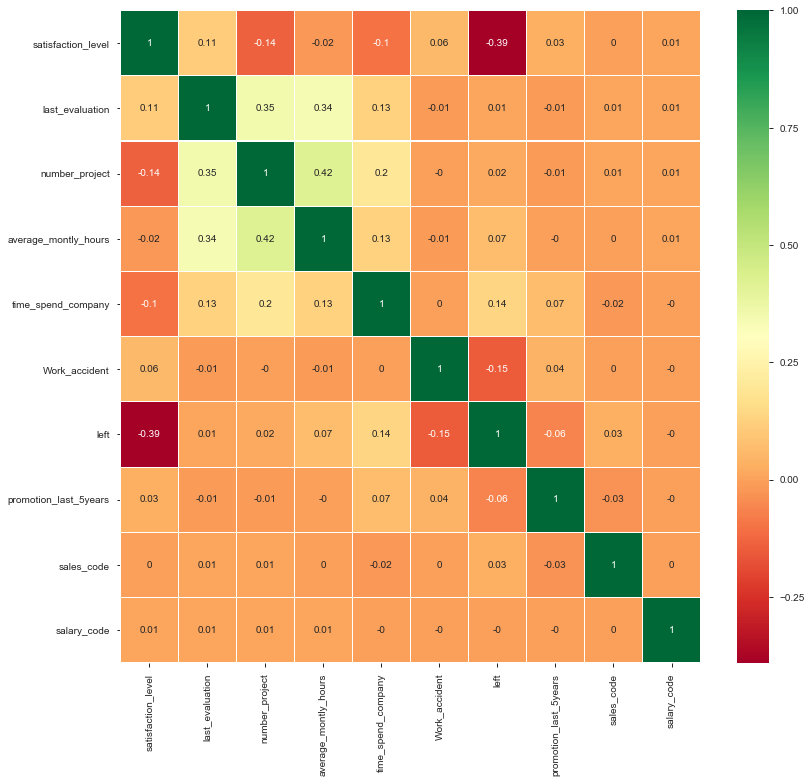

In [32]:
correlation_matrix = df_code.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

In [33]:
# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

df_code.profile_report()

In [34]:
df_code.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_code,salary_code
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
sales_code,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary_code,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


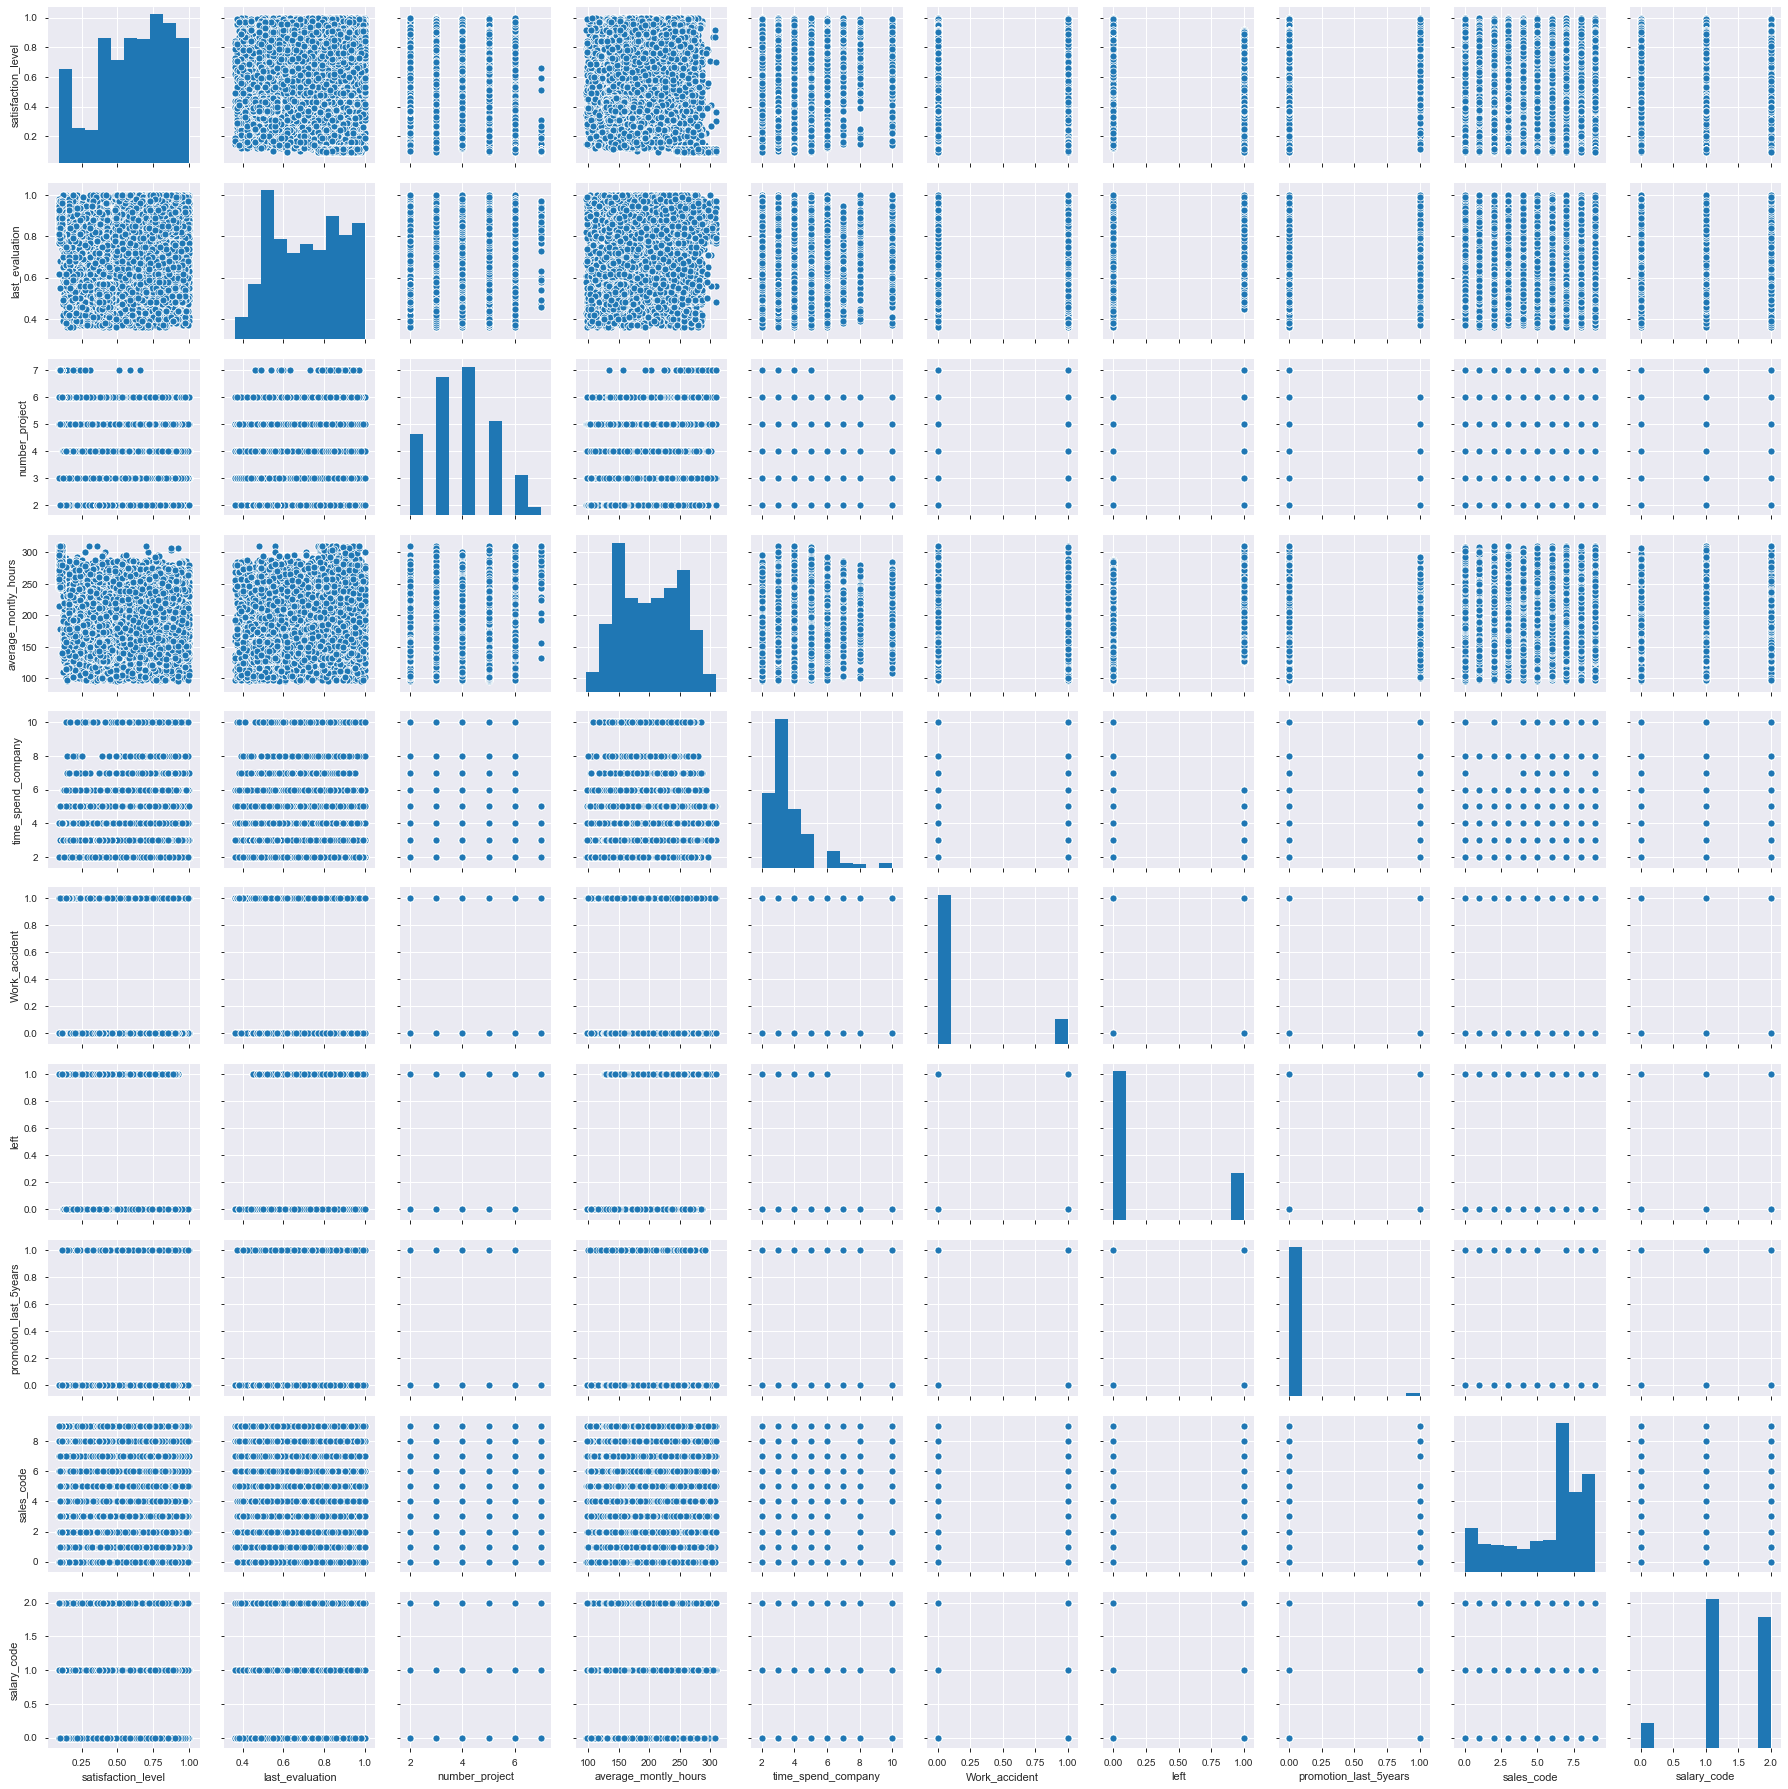

In [55]:
# 4.Визуализировать несколько взаимосвязей между переменными.
# Я хотел сделать интересный regplot, где будет видна хоть какая-нибудь интересная взаимосвязь,
# но тип данных не позволяет сразу этого сделать: очень много распределения по классам и равномерного
sns.pairplot(df_code)

In [83]:
# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

import statistics
import scipy.stats as sts

p_low = df[ df['salary']=='low']['satisfaction_level']
p_medium = df[ df['salary']=='medium']['satisfaction_level']
p_high = df[ df['salary']=='high']['satisfaction_level']

len(p_low), len(p_medium), len(p_high)

(7316, 6446, 1237)

# У сотрудников с низким и средним уровнем зп одинаковая степень удовлетворенности

In [84]:
p_low = p_low.sample(1000)
p_medium = p_medium.sample(1000)

In [85]:
statistics.variance(p_low), statistics.variance(p_medium)

(0.06289344534534534, 0.0625995954954955)

In [126]:
sts.ttest_ind(p_low, p_medium, equal_var=True)

Ttest_indResult(statistic=-2.3387913012336083, pvalue=0.019444354143549898)

In [ ]:
# Дисперсия одинакова, поэтому можно проводить стандартный t-test
# p-value меньше 0.05 - то есть, я могу отвергнуть нулевую гипотезу в пользу альтернативной:
# уровень удовлетовренности среди выборк разный

# У сотрудников с низким и высоким уровнем зп одинаковая степень удовлетворенности

In [87]:
p_low_t2 = p_low.sample(1000)
p_high_t2 = p_high.sample(1000)

In [88]:
statistics.variance(p_low_t2), statistics.variance(p_high_t2)

(0.06289344534534534, 0.050127204704704706)

In [127]:
sts.ttest_ind(p_low_t2, p_high_t2, equal_var=False)

Ttest_indResult(statistic=-3.692932714399095, pvalue=0.0002277101828144259)

In [ ]:
# Дисперсия отличается, поэтому нужно провести t-test Welch
# p-value меньше 0.05 - то есть, я могу отвергнуть нулевую гипотезу в пользу альтернативной:
# уровень удовлетовренности среди выборк разный


In [58]:
# 6.Рассчитать сколько работников работает в каждом департаменте.
pd.value_counts(df['sales'])

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

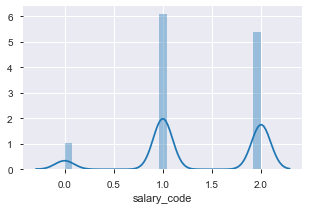

In [120]:
# 7.Показать распределение сотрудников по зарплатам.
sns.distplot(df_code['salary_code'])

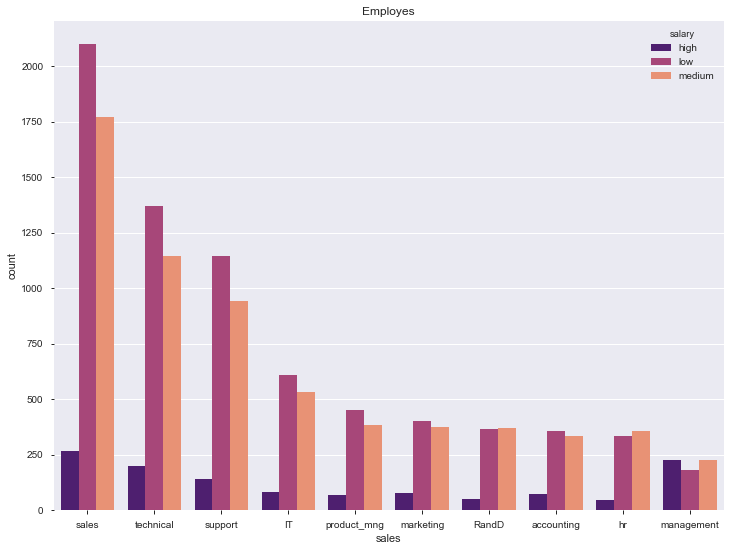

In [121]:
# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

sales_order = df['sales'].value_counts().index

sns.countplot(x = 'sales', hue = 'salary', data = df, palette = 'magma', order = sales_order)
plt.title('Employes')
plt.show()



In [93]:
# 9.Сколько сотрудников покинули компанию. Ответ: 3571
pd.value_counts(df['left'])

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

# У людей, которые остались, и которые покинули компанию случались происшествия на работе

In [122]:
p_left = df[ df['left']==1]['Work_accident']
p_slave = df[ df['left']==0]['Work_accident']

len(p_left), len(p_slave)

(3571, 11428)

In [123]:
p_left = p_left.sample(3000)
p_slave = p_slave.sample(3000)

In [124]:
statistics.variance(p_left), statistics.variance(p_slave)

(0.04450372346337668, 0.14290052239635434)

In [125]:
sts.ttest_ind(p_left, p_slave, equal_var=False)

Ttest_indResult(statistic=-15.94195061449575, pvalue=9.160222262402404e-56)

In [ ]:
# Дисперсия отличается, поэтому нужно провести t-test Welch
# p-value меньше 0.05 - то есть, я могу отвергнуть нулевую гипотезу в пользу альтернативной:
# происшествия на работе повлияли на то, остался человек на рабочем месте или нет

# Если посмотреть на матрицу корреляции, можно заметить, что это единственный фактор, связанный с тем,
# остался человек или нет. Конечно, у тех, кто покинул компания был низкий уровень удовлетворенности,
# который, в свою, очередь коррелирует разве что с кол-м проектов

# Уровень удовлетворенности зависит от кол-ва проектов

In [147]:
p_min_proj = df[ df['number_project'] == 2]['satisfaction_level'] #  минимальное кол-во проектов равно 2
p_multi_proj = df[ df['number_project'] > 2]['satisfaction_level']

len(p_min_proj), len(p_multi_proj)

(2388, 12611)

In [151]:
p_min_proj = p_min_proj.sample(2000)
p_multi_proj = p_multi_proj.sample(2000)

In [152]:
statistics.variance(p_min_proj), statistics.variance(p_multi_proj)

(0.025022870535267635, 0.06745586783391695)

In [153]:
sts.ttest_ind(p_min_proj, p_multi_proj, equal_var=False)

Ttest_indResult(statistic=-22.576624586193944, pvalue=4.47022232336408e-105)

In [ ]:
# Дисперсия отличается, поэтому нужно провести t-test Welch
# p-value меньше 0.05 - то есть, я могу отвергнуть нулевую гипотезу в пользу альтернативной:
# сотрудникам пофиг на кол-во пректов - они все равно могут быть неудовлетворенными

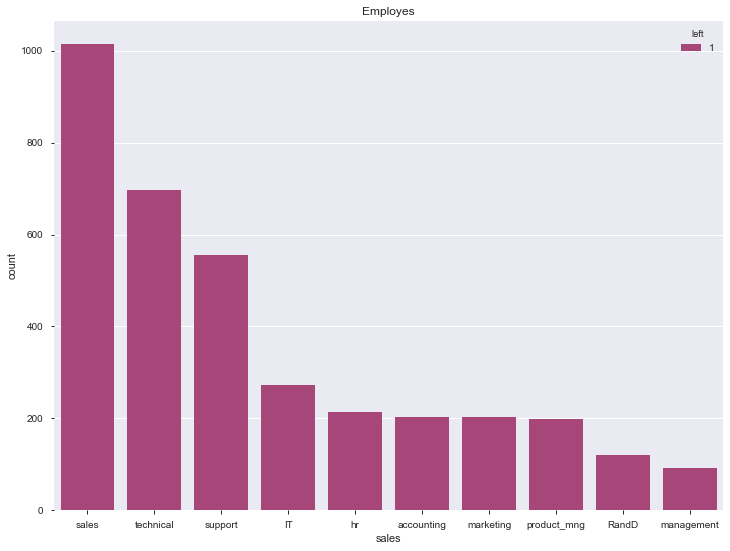

In [181]:
df_left = df [df['left'] == 1]
order_left = df_left['sales'].value_counts().index


sns.countplot(x = df_left['sales'], hue = df_left['left'], data = df_left, palette = 'magma', order = order_left)

plt.title('Employes')
plt.show()



In [ ]:
# Пока что сложно сделать вывод о том, почему люди покидали компанию
# Хотелось бы посмотреть на динакмику satisfactio_level по времени
# Пока что видно, что человек уходил или его увольняли, если был work_accident